In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/data_science_job.csv')

In [4]:
df.head(2)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0


In [18]:
# calculate how many percentage data is missing 
(df.isnull().sum()/df.shape[0])*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [17]:
df.shape

(19158, 13)

In [19]:
# we can perform cca for cols city_development_index ,enrolled_university,education_level and training hours because they has less than 5 % missing data    

In [35]:
# by code lets find how many cols have less than 5% missing data
col = df.columns[ ((df.isnull().sum()/df.shape[0])*100 < 5) & ((df.isnull().sum()/df.shape[0])*100 > 0)]
print(col)

Index(['city_development_index', 'enrolled_university', 'education_level',
       'experience', 'training_hours'],
      dtype='object')


# lets firstly handle numerical col

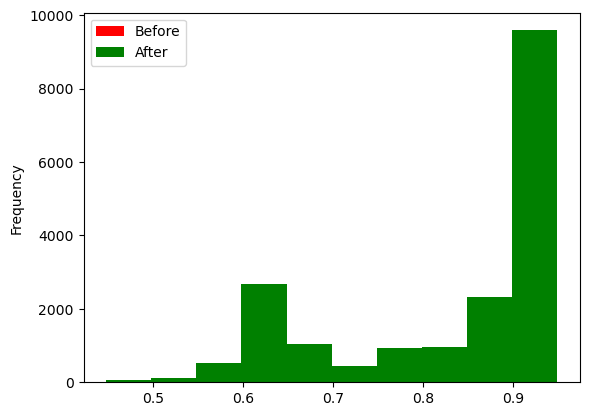

In [45]:
newdf = df['city_development_index'].dropna()
# lets plot graph comparing how many values are drop , is it affecting distribution or not
newdf.plot(kind='hist',color='red',label = 'Before')
df['city_development_index'].plot(kind='hist',color='green',label='After')
plt.legend()
# as we can see there no big difference in ditribution

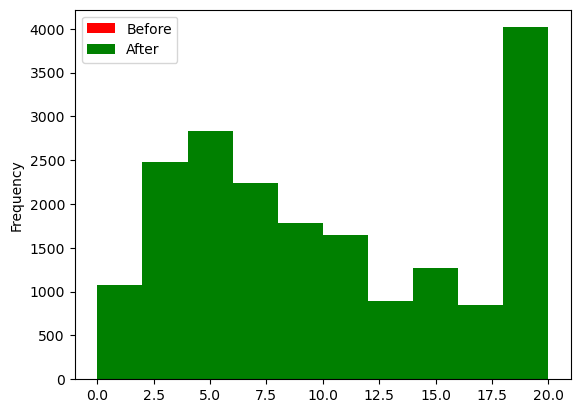

In [48]:
newdf = df['experience'].dropna()
# lets plot graph comparing how many values are drop , is it affecting distribution or not
newdf.plot(kind='hist',color='red',label = 'Before')
df['experience'].plot(kind='hist',color='green',label='After')
plt.legend()
# as we can see there no big difference in ditribution

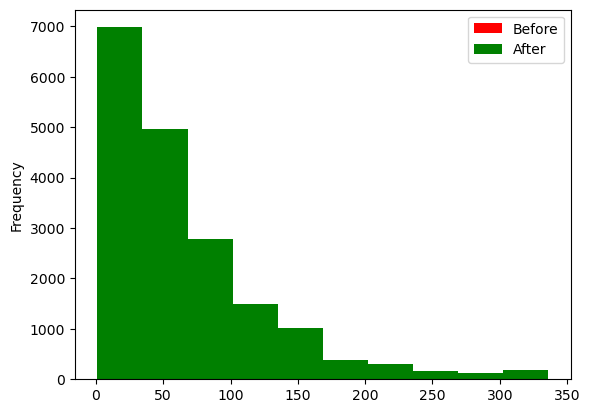

In [49]:
newdf = df['training_hours'].dropna()
# lets plot graph comparing how many values are drop , is it affecting distribution or not
newdf.plot(kind='hist',color='red',label = 'Before')
df['training_hours'].plot(kind='hist',color='green',label='After')
plt.legend()
# as we can see there no big difference in ditribution

# let's handle categorical col

In [52]:
# for categorical col we compare percentage comparision between new data and old data
# means we compare ration

In [59]:
newdf = df['enrolled_university'].dropna()

comparision = pd.concat([
    # for old data percentage of each category
    df['enrolled_university'].value_counts()/len(df),

    # for new data perentage of each catgory
    newdf.value_counts()/len(newdf)
],axis=1)

# add column names
comparision.columns = ['old', 'new']
comparision

,old,new
enrolled_university,,
no_enrollment,0.721213,0.736043
Full time course,0.196106,0.200139
Part time course,0.062533,0.063818


In [60]:
newdf = df['education_level'].dropna()

comparision = pd.concat([
    # for old data percentage of each category
    df['education_level'].value_counts()/len(df),

    # for new data perentage of each catgory
    newdf.value_counts()/len(newdf)
],axis=1)

# add column names
comparision.columns = ['old', 'new']
comparision

,old,new
education_level,,
Graduate,0.605387,0.620280
Masters,0.227633,0.233234
High School,0.105282,0.107872
Phd,0.021610,0.022141
Primary School,0.016077,0.016472
